In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef
from sklearn.decomposition import PCA

In [ ]:
df = pd.read_csv("heart_disease.csv")
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Diseased
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [3]:
df.replace('?', np.nan, inplace=True)
df = df.apply(pd.to_numeric, errors='coerce')

In [4]:
df.corr()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Diseased
age,1.000000,-0.097542,0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.362605,0.127389,0.223120
sex,-0.097542,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.093185,0.380936,0.276816
cp,0.104139,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.233214,0.265246,0.414446
restbp,0.284946,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.098773,0.133554,0.150825
chol,0.208950,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.119000,0.014214,0.085164
fbs,0.118530,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.145478,0.071358,0.025264
restecg,0.148868,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.128343,0.024531,0.169202
thalach,-0.393806,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.264246,-0.279631,-0.417167
exang,0.091661,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.145570,0.329680,0.431894
oldpeak,0.203805,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.295832,0.341004,0.424510


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
restbp      0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
Diseased    0
dtype: int64

In [6]:
df['ca'].unique()

array([ 0.,  3.,  2.,  1., nan])

In [7]:
df['thal'].unique()

array([ 6.,  3.,  7., nan])

In [8]:
mode_thal = df['thal'].mode()[0]
mode_ca = df['ca'].mode()[0]

In [9]:
df['thal'].fillna(mode_thal,inplace=True)
df['ca'].fillna(mode_ca,inplace=True)

C:\Users\pprav\AppData\Local\Temp\ipykernel_23724\640899925.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['thal'].fillna(mode_thal,inplace=True)
C:\Users\pprav\AppData\Local\Temp\ipykernel_23724\640899925.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, whe

In [10]:
df['ca'].unique()

array([0., 3., 2., 1.])

In [11]:
df['thal'].unique()

array([6., 3., 7.])

In [12]:
X = df[['cp', 'thalach', 'exang', 'oldpeak', 'ca', 'thal']]
y = df['Diseased']

In [13]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
param_grid_rbf = {'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10]}
grid_search_rbf = GridSearchCV(SVC(kernel='rbf', probability=True, random_state=42), param_grid_rbf, cv=3)
grid_search_rbf.fit(X_train, y_train)
print("Best parameters for RBF kernel:", grid_search_rbf.best_params_)

Best parameters for RBF kernel: {'C': 1, 'gamma': 0.01}


In [16]:
best_svm_rbf = grid_search_rbf.best_estimator_
best_svm_rbf.fit(X_train, y_train)

SVC(C=1, gamma=0.01, probability=True, random_state=42)

In [17]:
y_pred_best_rbf = best_svm_rbf.predict(X_test)
y_pred_proba_best_rbf = best_svm_rbf.predict_proba(X_test)[:, 1]

In [18]:
accuracy_best_rbf = accuracy_score(y_test, y_pred_best_rbf)
precision_best_rbf = precision_score(y_test, y_pred_best_rbf)
recall_best_rbf = recall_score(y_test, y_pred_best_rbf)
f1_best_rbf = f1_score(y_test, y_pred_best_rbf)
auc_best_rbf = roc_auc_score(y_test, y_pred_proba_best_rbf)
mcc_best_rbf = matthews_corrcoef(y_test, y_pred_best_rbf)

print("Best SVM (RBF Kernel) Performance:")
print(f"Accuracy: {accuracy_best_rbf:.4f}")
print(f"Precision: {precision_best_rbf:.4f}")
print(f"Recall: {recall_best_rbf:.4f}")
print(f"F1-Score: {f1_best_rbf:.4f}")
print(f"AUC: {auc_best_rbf:.4f}")
print(f"MCC: {mcc_best_rbf:.4f}")

Best SVM (RBF Kernel) Performance:
Accuracy: 0.9344
Precision: 0.9667
Recall: 0.9062
F1-Score: 0.9355
AUC: 0.9537
MCC: 0.8708


In [19]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

In [20]:
svm_rbf_pca = SVC(kernel='rbf', probability=True, random_state=42)
svm_rbf_pca.fit(X_train_pca, y_train)

SVC(probability=True, random_state=42)

In [ ]:
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(title)
    plt.show()

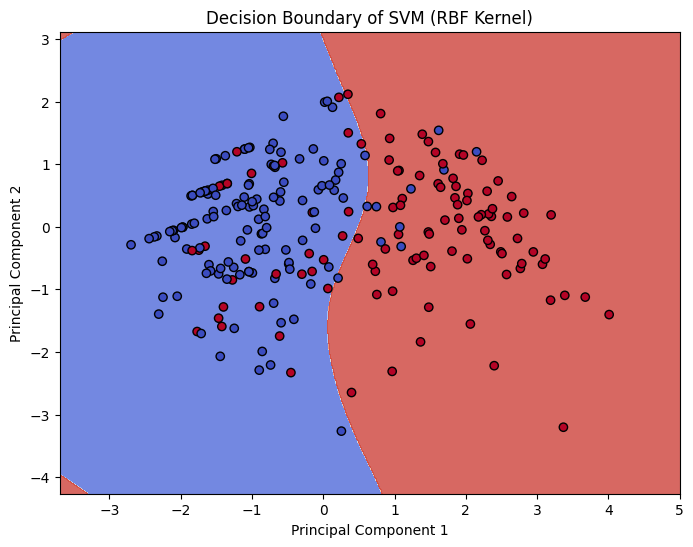

In [30]:
plot_decision_boundary(svm_rbf_pca, X_train_pca, y_train, 'Decision Boundary of SVM (RBF Kernel)')

In [23]:
param_grid_linear = {'C': [0.1, 1, 10, 100]}
grid_search_linear = GridSearchCV(SVC(kernel='linear', probability=True, random_state=42), param_grid_linear, cv=3)
grid_search_linear.fit(X_train, y_train)
print("Best parameters for Linear kernel:", grid_search_linear.best_params_)

Best parameters for Linear kernel: {'C': 0.1}


In [24]:
best_svm_linear = grid_search_linear.best_estimator_
best_svm_linear.fit(X_train, y_train)

SVC(C=0.1, kernel='linear', probability=True, random_state=42)

In [25]:
y_pred_best_linear = best_svm_linear.predict(X_test)
y_pred_proba_best_linear = best_svm_linear.predict_proba(X_test)[:, 1]

In [26]:
accuracy_best_linear = accuracy_score(y_test, y_pred_best_linear)
precision_best_linear = precision_score(y_test, y_pred_best_linear)
recall_best_linear = recall_score(y_test, y_pred_best_linear)
f1_best_linear = f1_score(y_test, y_pred_best_linear)
auc_best_linear = roc_auc_score(y_test, y_pred_proba_best_linear)
mcc_best_linear = matthews_corrcoef(y_test, y_pred_best_linear)

print("Best SVM (Linear Kernel) Performance:")
print(f"Accuracy: {accuracy_best_linear:.4f}")
print(f"Precision: {precision_best_linear:.4f}")
print(f"Recall: {recall_best_linear:.4f}")
print(f"F1-Score: {f1_best_linear:.4f}")
print(f"AUC: {auc_best_linear:.4f}")
print(f"MCC: {mcc_best_linear:.4f}")

Best SVM (Linear Kernel) Performance:
Accuracy: 0.9180
Precision: 0.9355
Recall: 0.9062
F1-Score: 0.9206
AUC: 0.9515
MCC: 0.8364


In [27]:
print("Classification Report for Best SVM (RBF Kernel):")
print(classification_report(y_test, y_pred_best_rbf))

Classification Report for Best SVM (RBF Kernel):
              precision    recall  f1-score   support

           0       0.90      0.97      0.93        29
           1       0.97      0.91      0.94        32

    accuracy                           0.93        61
   macro avg       0.93      0.94      0.93        61
weighted avg       0.94      0.93      0.93        61



In [28]:
print("Classification Report for Best SVM (Linear Kernel):")
print(classification_report(y_test, y_pred_best_linear))

Classification Report for Best SVM (Linear Kernel):
              precision    recall  f1-score   support

           0       0.90      0.93      0.92        29
           1       0.94      0.91      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61

